In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import requests
from mosaicml import *
from mosaicml.constants import MLModelFlavours

In [51]:
dataset = pd.read_csv('/data/Salary_Data_2.csv')
#X_sch = dataset.drop(["salary"],axis =1)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
print(dataset)
print(X_sch.head(2).to_json())
#print (X)
#print(y)

    yearsexperience    salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0
{"yearsexperience":{"0":1.1,"1":1.3}}


In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [53]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [54]:
y_pred = model.predict(X_test)

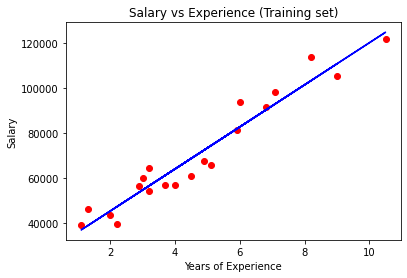

In [55]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, model.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

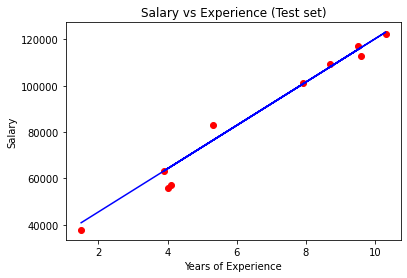

In [56]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, model.predict(X_test), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [57]:
@scoring_func
def score(model, request):
    payload = request.json['input']
    data = pd.DataFrame(eval(payload))
    prediction = pd.Series(model.predict(data))
    return prediction.tolist()
#X_sch = list(X_sch)

In [58]:
req = requests.Request()
req.json = {"input":"{1}"}

sch = generate_schema(score,(model, req),1)
print(sch)

{'input': {'type': 'integer', 'format': 'int64', 'example': 1}, 'output': {'type': 'array', 'items': {'type': 'object'}, 'example': [36162.13468715356]}}


In [59]:
register_model(model, score, name="Salary_prediction", 
                description="Predict Salary",
                flavour=MLModelFlavours.sklearn, schema=sch,
                y_true=y_test, y_pred=pd.Series(y_pred), 
                prob=y_pred, features=X_train.columns, labels=["yearsexperience"], init_script="" ,
                model_type="regression", 
                input_type="json", explain_ai=True, x_train=X_train, x_test=X_test, 
                y_train=y_train, y_test=y_test,
                feature_names=list(X_train.columns),feature_ids=list(X_train.columns),
                target_names=["salary"], 
                kyd=False, kyd_score =False
              )
print("Registering model")

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [7]:
pip install matplotlib

     |████████████████████████████████| 11.5MB 9.9MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/14/32/d3fa649ad7ec0b82737b92fefd3c4dd376b0bb23730715124569f38f3a08/numpy-1.19.5-cp36-cp36m-manylinux2010_x86_64.whl
     |████████████████████████████████| 112kB 79.9MB/s eta 0:00:01
     |████████████████████████████████| 256kB 104.5MB/s eta 0:00:01
     |████████████████████████████████| 1.1MB 58kB/s s eta 0:00:01
     |████████████████████████████████| 3.1MB 82.0MB/s eta 0:00:01
ERROR: openapi-spec-validator 0.3.3 has requirement pyrsistent<0.17.0, but you'll have pyrsistent 0.17.3 which is incompatible.
ERROR: mosaic-connector-python 1.0.0 has requirement numpy==1.16.1, but you'll have numpy 1.19.5 which is incompatible.
ERROR: mosaic-connector-python 1.0.0 has requirement pandas==1.0.4, but you'll have pandas 0.23.2 which is incompatible.
ERROR: mosaic-ai-serving 1.0.0 has requirement matplotlib==3.1.1; python_version < "3.8", but you'll have matplotlib 3.3.4 w

In [1]:
pip install mosaicml

ERROR: Could not find a version that satisfies the requirement mosaicml (from versions: none)
ERROR: No matching distribution found for mosaicml
Note: you may need to restart the kernel to use updated packages.
